In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# AFAD --> 15-40 ages
afad_TRAIN_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/afad_test'
afad_TEST_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/afad_train.csv'
afad_VALID_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/afad_valid.csv'

# CACD --> 14-62 ages
cacd_TRAIN_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/cacd_train.csv'
cacd_TEST_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/cacd_test.csv'
cacd_VALID_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/cacd_valid.csv'

# MORPH --> 16-70 ages
morph_TRAIN_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/morph2_train.csv'
morph_TEST_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/morph2_test.csv'
morph_VALID_CSV_PATH = 'C:/Users/Abril/OneDrive/UNIVERSITAT/3r 2023-2024 (2)/Xarxes Neuronals/projecte/datasets/morph2_valid.csv'


afad_path = [afad_TRAIN_CSV_PATH, afad_TEST_CSV_PATH, afad_VALID_CSV_PATH]
cacd_path = [cacd_TRAIN_CSV_PATH, cacd_TEST_CSV_PATH, cacd_VALID_CSV_PATH]
morph_path = [morph_TRAIN_CSV_PATH, morph_TEST_CSV_PATH, morph_VALID_CSV_PATH]

In [4]:
# create directory to save the splitted datasets
if not os.path.exists('./LABELS_splitted_datasets'):
    os.makedirs('./LABELS_splitted_datasets')

No em funciona be el path aixi que fe utiltzat aquesta manera penjant els datasets al colab.

In [19]:
afad_path = ['afad_test.csv', 'afad_train.csv', 'afad_valid.csv']
cacd_path = ['cacd_test.csv', 'cacd_train.csv', 'cacd_valid.csv']
morph_path = ['morph2_test.csv', 'morph2_train.csv', 'morph2_valid.csv']

#SPLIT DATASETS

In [20]:
# split datasets
names = ['train', 'test', 'valid']
# Valores de edad a filtrar
ages = [15, 20, 25, 30, 35, 40]

for i, ap in enumerate(afad_path):
    df = pd.read_csv(ap)
    df = df[df['age'].isin(ages)]
    df.to_csv('./LABELS_splitted_datasets/afad_splitLABELS_' + names[i] + '.csv', index=False)

for i,cp in enumerate(cacd_path):
    df = pd.read_csv(cp)
    df = df[df['age'].isin(ages)]
    df.to_csv('./LABELS_splitted_datasets/cacd_splitLABELS_'+names[i]+'.csv', index=False)

for i,mp in enumerate(morph_path):
    df = pd.read_csv(mp)
    df = df[df['age'].isin(ages)]
    df.to_csv('./LABELS_splitted_datasets/morph_splitLABELS_'+names[i]+'.csv', index=False)

print('Done!')

Done!



AFAD train


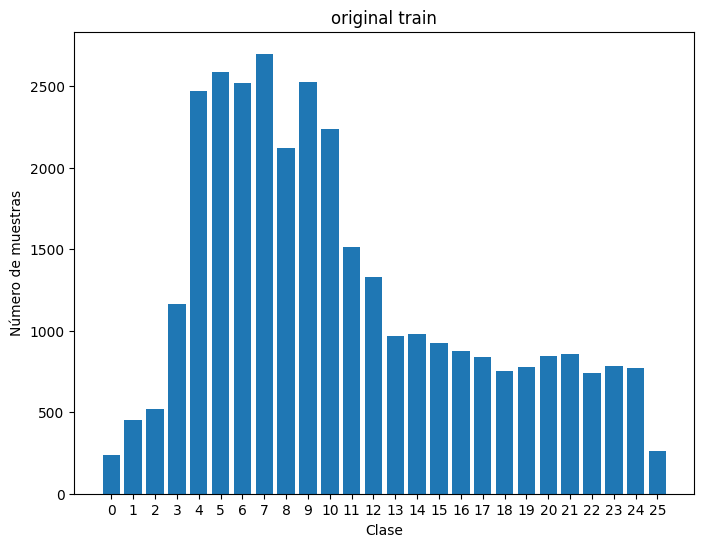

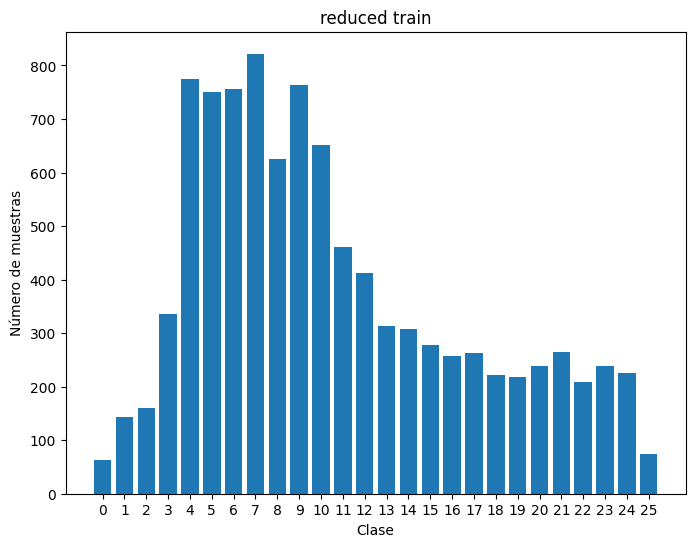

original len: 32762
reduced len: 9828

AFAD test


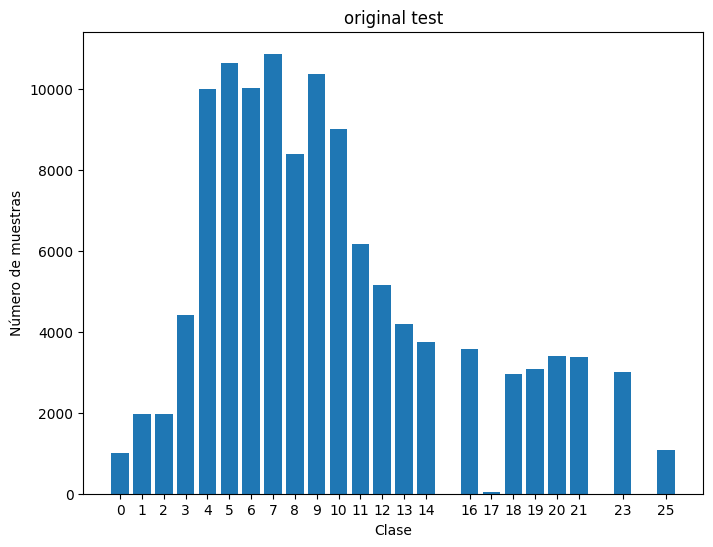

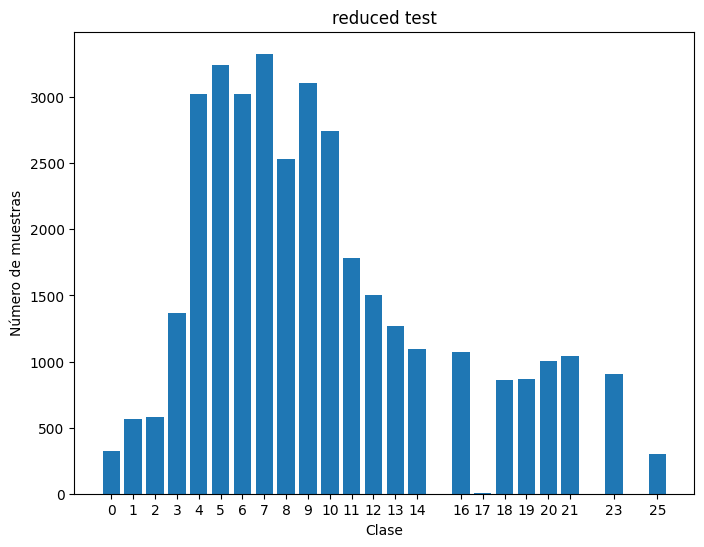

original len: 118491
reduced len: 35547

AFAD valid


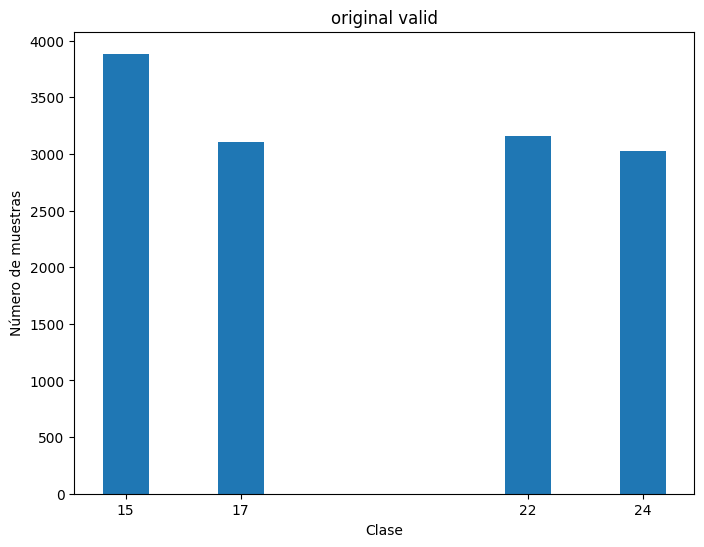

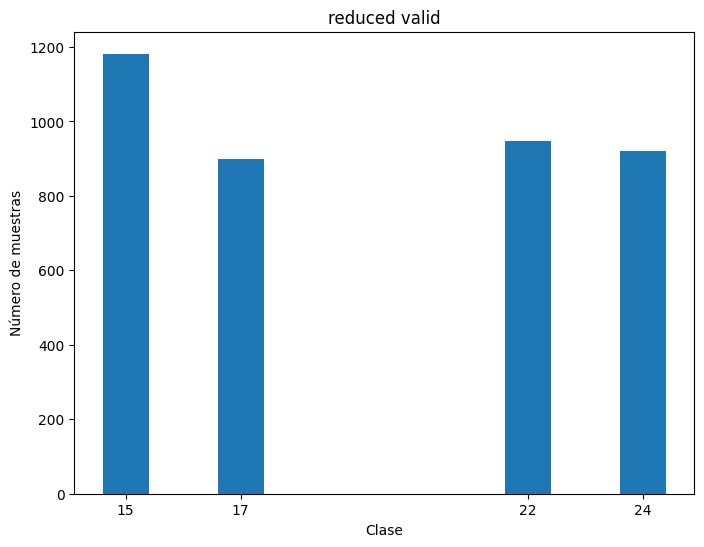

original len: 13165
reduced len: 3949


In [24]:
# SHOW DATA DISTRIBUTION

def plot_class_distribution(df, title):
    class_counts = df['age'].value_counts()
    classes = class_counts.index
    counts = class_counts.values

    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts)
    plt.xlabel('Clase')
    plt.ylabel('Número de muestras')
    plt.title(title)
    plt.xticks(classes)
    plt.show()

type = ['train', 'test', 'valid']

reduct_value = 0.3
reduced_datasets = []  # Lista para almacenar los conjuntos de datos reducidos

for i, path in enumerate(afad_path):
    print('\nAFAD', type[i])
    df = pd.read_csv(path)
    n_samples = int(reduct_value * len(df))
    reduced_df = df.sample(n=n_samples, random_state=42)
    plot_class_distribution(df, f'original {type[i]}')
    plot_class_distribution(reduced_df, f'reduced {type[i]}')
    print('original len:',len(df))
    print('reduced len:',len(reduced_df))

    # save reduced dataset
    df.to_csv(f'./LABELS_splitted_datasets/afad_splitLABELS_{type[i]}.csv', index=False)